<a href="https://colab.research.google.com/github/PaoDeV99/ML_Progetto1_G72/blob/master/p1_g72_gboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Gradient Boosting Classifier**

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Diario di bordo**

22/06, ore 00:03 <br/>
gbc non accetta in ingresso direttive sul decision tree classifier. Questo vuol dire niente gini (anche se dovrebbe essere impostata di default per i dtc) e niente impostazione sulla max depth (si può ovviare andando ad operare su min_samples_split, ma non sarebbe esattamente la stessa cosa). <br/>
<br/>
Il notebook presenta ancora i risultati di una run di gbc con n_estimators=1000. È stato predisposto per runnare in un ciclo comandato dal numero di stimatori, che varia secondo i valori di estimators. Va ancora impostato per bene il ciclo, prima di farlo runnare. Raccomando pazienza per quando si deciderà di farlo partire: prospetto un tempo di run abbastanza lungo, intorno ai 70 minuti. <br/>
<br/>
Vanno aggiunte delle celle che si occuppino di produrre i plot dell'accuracy al variare del numero di stimatori, così come del tempo di run (ispirati a randomforest). <br/>
<br/>
Finito il lavoro descritto sopra, puoi implementare una feature importance e vedere se e cosa cambia. <br/>
<br/>
Se hai fatto anche quello, perché non tentare la sorte con una random forest classica? O con una logistic regression? A scopo puramente accademico, sarebbe interessante vedere se la logistic regression di oggi riesce a battere il prototipo di gbc e abc.

22/06, ore 22:42 <br/>
Ho inserito la possibilità di collegare il notebook al drive, in modo da non dover ricaricare a mano il txt dei dati ad ogni sessione di lavoro. <br/>
Ho terminato la stesura del ciclo di run di gbc. È impostato per runnare con 100, 200, 500, 800 e 1000 stimatori. Vengono registragti tempo di run, training accuracy, test accuracy e confusion matrix. Ho commentato le celle relative all'impostazione precedente del notebook. <br/>
(Nota a margine: i print effettuati non sono quelli impostati nelle celle. Le modifiche, volte a favorire un'estetica migliore nei print, sono state effettuate solo dopo aver fatto partire il ciclo.)

24/06, ore 16:41 <br/>
Su suggerimento di @Zdestrion, ho aggiunto una cella di reshuffling del dataset, in modo da presentare dati relativi a rumore a segnale in quantità più simili possibile a training set e test set. I risultati cambiano di un nulla.

28/06, ore 01:13 <br/>
Ho aggiunto una regressione logistica con regolarizzazione L2. Ci sono dei problemi con il plot degli istogrammi delle probabilità delle due classi.<br/>
Cose ancora da fare:
*   Aggiungere le funzioni di plot delle accuracy e del tempo di run di gbc.
*   Aggiungere anche valori intermedi di stimatori, per avere più dati.
*   Implementare una feature importance con numero di stimatori cui risulta associata l'accuracy migliore (evidentemente 1000).
*   Provare ad operare una separazione tramite pca e tsne.



29/06, ore 00:53 <br/>
Risolto il problema del plot della regressione logistica. <br/>
Ho provato ad implementare pca e tsne. La divergenza kl non è male, ma il plot è più una macchia di rorschach che altro.

30/06, ore 23:55 <br/>
Ho aggiunto alcuni valori intermedi di *estimators* per gbc, nonché una cella dedita al plot dei risultati di gbc. <br/>
Credo che lascerò perdere pca e tsne, in fondo si tratta di classificazione, non di clustering. <br/>
Ho aggiunto una sezione sulla feature importance. <br/>

Tutti i cambiamenti effettuati oggi non sono ancora operativi, in quanto non ho effettuato ancora alcuna run. Pronostico circa due ore e mezza di run e vorrei andare a dormire.

02/07, ore 00:02 <br/>
Ho fatto runnare le parti del notebook aggiunte nella sessione precedente. <br/>
Sono in attesa che @PaoDeV99 mi dica se vuole fare una run su diversi valori di estimators escludendo gli outliers o preferisce selezionare solo il valore di estimators che restiuisce le accuracies migliori. In entrambi i casi, questa cosa andrà aggiunta nel notebook. Devo anche modificare il grafico delle feature importances, riutilizzando quanto già fatto da @PaoDeV99. Devo anche droppare la colonna del signal nella feature importance. <br/>
Sto pensando di proporre un fit del tempo di run di gbc in funzione del numero di stimatori. Devo cercare una funzione che faccia fit lineari senza incertezze sui valori che le passo. Spero che il grande mondo di python ne abbia una. <br/>

Ho cominciato a commentare il notebook (ho concluso la prima parte su gbc). Vanno aggiunti eventuali riferimenti alle confusion matrices, se decidiamo di tenerle.

03/07, ore 02:03 <br/>
Ho apportato i cambiamenti annunciati nella sessione precedente. Fungono.

**Commenti**

Conduciamo una prima analisi con la funzione *GradientBoostingClassifier* implementata nella libreria *scikitlearn*. <br/>
Importiamo il file di dati *miniBooNE_PID.txt*, precedentemente caricato su Google Drive, e creiamo un dataset *df* con *pandas*.

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import warnings
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

warnings.filterwarnings('ignore')

In [35]:
df = pd.read_fwf('/content/drive/My Drive/Colab Notebooks/MiniBooNE_PID.txt')

In [36]:
df

,36499 93565,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49
0,2.59413,0.468803,20.6916,0.322648,0.009682,0.374393,0.803479,0.896592,3.59665,0.249282,4.18624,135.885000,0.928671,0.140918,2.58663,1689.070,1.197950,19.35610,0.398340,0.658684,1.561270,0.320885,108.8560,5.16994,0.491493,0.868283,29.6141,1.222990,0.190005,-0.654163,4.97666,0.908007,0.385076,377.412,0.136108,0.310650,2.952640,-4.55567,0.934167,0.049752,101.174,-31.37300,0.442259,5.86453,0.000000,0.090519,0.176909,0.457585,0.071769,0.245996
1,3.86388,0.645781,18.1375,0.233529,0.030733,0.361239,1.069740,0.878714,3.59243,0.200793,4.65578,331.718000,0.882784,0.368855,2.24638,1388.260,0.839230,6.69510,0.277778,0.944626,1.664640,0.256501,102.4930,5.33218,0.474294,-0.336652,31.5767,1.317170,0.141945,0.093886,5.05478,1.394390,0.325034,215.837,0.082048,0.297530,0.777241,-4.76871,1.438210,0.068714,186.516,45.95970,-0.478507,6.11126,0.001182,0.091800,-0.465572,0.935523,0.333613,0.230621
2,3.38584,1.197140,36.0807,0.200866,0.017341,0.260841,1.108950,0.884405,3.43159,0.177167,4.50807,159.396000,0.412250,0.434002,2.38485,992.098,0.514175,16.00300,0.256262,0.318984,-0.727361,0.312139,69.8362,3.44976,0.497076,-0.314786,59.2516,1.187650,0.192565,-0.511144,5.27196,1.002860,1.690870,417.430,0.068628,0.220612,1.390970,-2.02213,1.843790,0.085132,129.931,-11.56080,-0.297008,8.27204,0.003854,0.141721,-0.210559,1.013450,0.255512,0.180901
3,4.28524,0.510155,674.2010,0.281923,0.009174,0.000000,0.998822,0.823390,3.16382,0.171678,4.08041,-1.865600,0.833067,0.181294,2.49837,1289.160,0.630307,12.93740,0.266055,1.313580,0.698101,0.306193,148.0340,4.12461,0.494778,0.331151,17.8265,1.700340,0.147487,0.313964,7.91668,1.584410,0.557134,352.699,0.079246,0.338915,-0.331218,-3.52184,1.244390,0.105550,163.978,-18.45860,0.453886,2.48112,0.000000,0.180938,0.407968,4.341270,0.473081,0.258990
4,5.93662,0.832993,59.8796,0.232853,0.025066,0.233556,1.370040,0.787424,3.66546,0.174862,4.59180,183.668000,0.398421,0.353034,2.04136,949.231,0.389585,13.91750,0.281003,0.282402,-0.039672,0.233509,106.8670,2.94245,0.464260,-0.033102,139.4700,1.687930,0.117804,0.021927,7.80990,1.317420,0.677348,317.556,0.041526,0.249403,-0.360560,-3.18766,1.808670,0.105852,229.555,42.96000,-0.975752,2.66109,0.000000,0.170836,-0.814403,4.679490,1.924990,0.253893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130059,4.80718,1.451020,174.6920,0.343481,0.002174,0.000000,0.747401,0.725617,3.18501,0.152208,4.09329,-0.707947,0.813344,0.015294,1.83104,520.017,0.192353,7.59299,0.271739,0.580181,2.706590,0.321739,18.9165,4.77587,0.488641,0.578023,106.1100,1.827670,0.174318,0.523787,7.59281,1.451220,0.616285,453.588,0.015260,0.291661,-0.445277,-3.02319,1.513750,0.055040,179.832,-2.74376,0.317051,2.67617,0.000000,0.141958,0.723207,7.446300,3.219320,0.299487
130060,5.00527,1.501860,129.9270,0.273477,0.006098,0.109769,1.325370,0.830334,3.40836,0.130794,4.23870,49.729900,0.527637,0.337350,2.32783,779.822,0.295920,12.35990,0.280488,1.630800,-0.447177,0.302846,64.8961,2.66737,0.443424,-0.060302,149.7250,1.565400,0.138097,0.199993,7.29614,1.130380,1.100050,414.089,0.072055,0.288639,0.780298,-2.74524,1.216240,0.110098,120.794,-24.72180,0.312652,4.16524,0.000000,0.232273,0.141153,1.898750,1.778180,0.258058
130061,3.10842,2.178140,56.3651,0.211850,0.000000,0.167382,1.318900,0.870681,

Aggiungiamo una colonna al dataset, corrispondente alla classificazione che vogliamo ottenere. La nuova colonna *signal* conterrà il valore 1 per i primi 36499 eventi (corrispondenti al rilevamento di un segnale) e 0 per i successivi (associati al rumore sperimentale).

In [37]:
df["signal"]=0
df.iloc[0:36499,50]=1
df.iloc[36499:,50]=0
df

,36499 93565,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,signal
0,2.59413,0.468803,20.6916,0.322648,0.009682,0.374393,0.803479,0.896592,3.59665,0.249282,4.18624,135.885000,0.928671,0.140918,2.58663,1689.070,1.197950,19.35610,0.398340,0.658684,1.561270,0.320885,108.8560,5.16994,0.491493,0.868283,29.6141,1.222990,0.190005,-0.654163,4.97666,0.908007,0.385076,377.412,0.136108,0.310650,2.952640,-4.55567,0.934167,0.049752,101.174,-31.37300,0.442259,5.86453,0.000000,0.090519,0.176909,0.457585,0.071769,0.245996,1
1,3.86388,0.645781,18.1375,0.233529,0.030733,0.361239,1.069740,0.878714,3.59243,0.200793,4.65578,331.718000,0.882784,0.368855,2.24638,1388.260,0.839230,6.69510,0.277778,0.944626,1.664640,0.256501,102.4930,5.33218,0.474294,-0.336652,31.5767,1.317170,0.141945,0.093886,5.05478,1.394390,0.325034,215.837,0.082048,0.297530,0.777241,-4.76871,1.438210,0.068714,186.516,45.95970,-0.478507,6.11126,0.001182,0.091800,-0.465572,0.935523,0.333613,0.230621,1
2,3.38584,1.197140,36.0807,0.200866,0.017341,0.260841,1.108950,0.884405,3.43159,0.177167,4.50807,159.396000,0.412250,0.434002,2.38485,992.098,0.514175,16.00300,0.256262,0.318984,-0.727361,0.312139,69.8362,3.44976,0.497076,-0.314786,59.2516,1.187650,0.192565,-0.511144,5.27196,1.002860,1.690870,417.430,0.068628,0.220612,1.390970,-2.02213,1.843790,0.085132,129.931,-11.56080,-0.297008,8.27204,0.003854,0.141721,-0.210559,1.013450,0.255512,0.180901,1
3,4.28524,0.510155,674.2010,0.281923,0.009174,0.000000,0.998822,0.823390,3.16382,0.171678,4.08041,-1.865600,0.833067,0.181294,2.49837,1289.160,0.630307,12.93740,0.266055,1.313580,0.698101,0.306193,148.0340,4.12461,0.494778,0.331151,17.8265,1.700340,0.147487,0.313964,7.91668,1.584410,0.557134,352.699,0.079246,0.338915,-0.331218,-3.52184,1.244390,0.105550,163.978,-18.45860,0.453886,2.48112,0.000000,0.180938,0.407968,4.341270,0.473081,0.258990,1
4,5.93662,0.832993,59.8796,0.232853,0.025066,0.233556,1.370040,0.787424,3.66546,0.174862,4.59180,183.668000,0.398421,0.353034,2.04136,949.231,0.389585,13.91750,0.281003,0.282402,-0.039672,0.233509,106.8670,2.94245,0.464260,-0.033102,139.4700,1.687930,0.117804,0.021927,7.80990,1.317420,0.677348,317.556,0.041526,0.249403,-0.360560,-3.18766,1.808670,0.105852,229.555,42.96000,-0.975752,2.66109,0.000000,0.170836,-0.814403,4.679490,1.924990,0.253893,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130059,4.80718,1.451020,174.6920,0.343481,0.002174,0.000000,0.747401,0.725617,3.18501,0.152208,4.09329,-0.707947,0.813344,0.015294,1.83104,520.017,0.192353,7.59299,0.271739,0.580181,2.706590,0.321739,18.9165,4.77587,0.488641,0.578023,106.1100,1.827670,0.174318,0.523787,7.59281,1.451220,0.616285,453.588,0.015260,0.291661,-0.445277,-3.02319,1.513750,0.055040,179.832,-2.74376,0.317051,2.67617,0.000000,0.141958,0.723207,7.446300,3.219320,0.299487,0
130060,5.00527,1.501860,129.9270,0.273477,0.006098,0.109769,1.325370,0.830334,3.40836,0.130794,4.23870,49.729900,0.527637,0.337350,2.32783,779.822,0.295920,12.35990,0.280488,1.630800,-0.447177,0.302846,64.8961,2.66737,0.443424,-0.060302,149.7250,1.565400,0.138097,0.199993,7.29614,1.130380,1.100050,414.089,0.072055,0.288639,0.780298,-2.74524,1.216240,0.110098,120.794,-24.72180,0.312652,4.16524,0.000000,0.232273,0.141153,1.898750,1.778180,0.258058,0
130061,3.10842,2.178140,56.3651,0.211850,0.000000,0.

Eliminiamo la colonna contenente gli indici delle righe e dividiamo il dataset in due campioni di dati (uno per il training dell'algoritmo ed uno per il test del classificatore, contnenete la metà dei dati del campione di training).

In [38]:
df = df.sample(frac=1).reset_index(drop=True)

In [39]:
 x_train, x_test, y_train, y_test = train_test_split(
   df.iloc[:,0:50], df["signal"], test_size=0.33, random_state=42)

Utilizziamo ora i campioni generati per addestrare l'algoritmo e testare le sue prestazion, variando il numero di stimatori (ovvero il numero di alberi) utilizzato dal classificatore. Passiamo da un minimo di 100 ad un massimo di 1000 stimatori, mantenendo invariati il *learning rate* dell'algoritmo (0.1) ed il numero massimo di iterazioni che esso compie (100). <br/>
Grafichiamo quindi i valori di accuracy in fase di training e in fase di test al variare del numero di stimatori. In un secondo grafico, infine, riportiamo l'andamento del tempo di *run* dell'algoritmo al variare del numero di stimatori.

In [40]:
estimators = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

m=len(estimators)
#n=len(leaf_size_list)

#Allocate Arrays for various quantities
gbc_train_accuracy=np.zeros((m))
gbc_test_accuracy=np.zeros((m))
run_time=np.zeros((m))

for i, nest in enumerate(estimators):
  # Define Gradient Boosting Classifier
  gbc = GradientBoostingClassifier(n_estimators=nest, min_samples_split=2, random_state=0, warm_start=True)
        
  print('n_estimators: %i'%(nest))
        
  start_time = time.time()
  gbc.fit(x_train, y_train)
  run_time[i] = time.time() - start_time    
    
  # check accuracy
  gbc_train_accuracy[i]=gbc.score(x_train,y_train)
  gbc_test_accuracy[i]=gbc.score(x_test,y_test)
  predictions = gbc.predict(x_test)
        
  result = (run_time[i], gbc_train_accuracy[i], gbc_test_accuracy[i])
  print('{0:<15}{1:<15}{2:<15}'.format("time (s)","train score", "test score"))
  print('{0:<15.4f}{1:<15.4f}{2:<15.4f}'.format(*result))
  print('\nConfusion matrix:')
  print(confusion_matrix(y_test, predictions))
  print('\n')

n_estimators: 100
time (s)       train score    test score     
197.2706       0.9321         0.9295         

Confusion matrix:
[[29393  1501]
 [ 1523 10505]]


n_estimators: 200
time (s)       train score    test score     
392.6840       0.9403         0.9357         

Confusion matrix:
[[29484  1410]
 [ 1349 10679]]


n_estimators: 300
time (s)       train score    test score     
596.5527       0.9442         0.9375         

Confusion matrix:
[[29512  1382]
 [ 1302 10726]]


n_estimators: 400
time (s)       train score    test score     
796.9929       0.9477         0.9389         

Confusion matrix:
[[29538  1356]
 [ 1266 10762]]


n_estimators: 500
time (s)       train score    test score     
991.0860       0.9500         0.9395         

Confusion matrix:
[[29548  1346]
 [ 1251 10777]]


n_estimators: 600
time (s)       train score    test score     
1191.9884      0.9523         0.9406         

Confusion matrix:
[[29569  1325]
 [ 1226 10802]]


n_estimators: 700
time (s)  

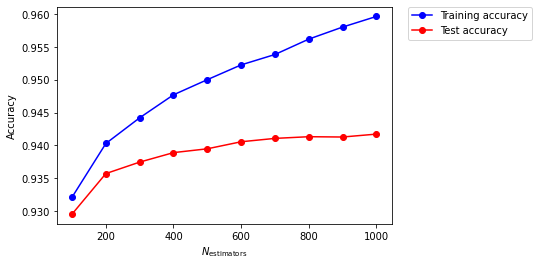

No handles with labels found to put in legend.


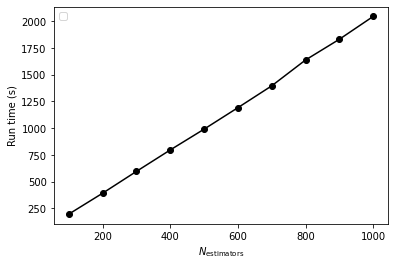

In [41]:
plt.figure()
plt.plot(estimators,gbc_train_accuracy,'o-b', label='Training accuracy')
plt.plot(estimators,gbc_test_accuracy,'o-r', label='Test accuracy')

plt.xlabel('$N_\mathrm{estimators}$')
plt.ylabel('Accuracy')
lgd=plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("gbc.pdf",bbox_extra_artists=(lgd,), bbox_inches='tight')

plt.show()

plt.plot(estimators, run_time, 'o-k')
plt.xlabel('$N_\mathrm{estimators}$')
plt.ylabel('Run time (s)')


plt.legend(loc=2)
plt.savefig("runtimegbc.pdf")

plt.show()

Osserviamo che l'accuracy sul campione di training cresce molto più velocemente di quella relativa al campione di test. All'aumentare del numero di stimatori, dunque, l'algoritmo tende all'overfitting. Tuttavia, il risultato migliore (ottenuto con 1000 stimatori e corrispondente ad una *training accuracy* del $96.0\%$ ed una *test accuracy* del $94.1\%$ costituiscono un risultato ottimo dal punto di vista della capacità di classificazione dell'algoritmo e, al contempo, non presentano un overfitting sufficientemente alto da lasciare dubbi sulla qualità della prestazione. <br/>
Il secondo grafico mostra invece una chiara dipendenza lineare del tempo di *run* dell'algoritmo dal numero di stimatori utilizzati.

#**GBC senza outliers**

In [42]:
from scipy import stats
z = np.abs(stats.zscore(df))
print(z)

[[0.03263321 0.08254602 0.47595816 ... 0.0312032  0.05965226 1.60109178]
 [0.05094932 0.04486378 0.11411881 ... 0.07907838 0.0612153  0.62457381]
 [0.02911956 0.07863879 5.85859963 ... 0.03202475 0.0602335  1.60109178]
 ...
 [0.05036582 0.06896428 0.5038528  ... 0.04441755 0.06011423 1.60109178]
 [0.08588908 0.04899207 0.0734121  ... 0.09247012 0.06038506 0.62457381]
 [0.03314984 0.04855195 0.53218397 ... 0.03969731 0.06200338 1.60109178]]


In [43]:
print(np.where(z > 3))

(array([     0,      0,      2, ..., 130049, 130050, 130058]), array([15, 22,  2, ..., 33, 22, 15]))


In [44]:
df_o = df[(z < 3).all(axis=1)]
df_o = df_o.sample(frac=1).reset_index(drop=True)
df_o

,36499 93565,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,signal
0,6.05417,1.47425,154.8200,0.350647,0.001812,0.045134,0.680303,0.803717,3.66846,0.164228,4.28067,285.235,-0.040335,0.092607,1.88150,848.558,0.292959,50.2449,0.304348,0.968379,-0.197082,0.260870,77.9672,2.42978,0.327132,0.032972,106.56300,1.72985,0.219814,-0.988548,9.72368,0.759344,2.417970,379.985,0.034881,0.182114,-0.130713,-1.55346,1.412740,0.117531,144.1320,-27.5457,1.179620,4.67735,0.000000,0.200921,0.274302,2.78353,1.966090,0.252260,0
1,5.83516,1.94890,116.2200,0.362147,0.000000,0.157833,1.041510,0.786507,3.54027,0.117574,4.26497,167.034,-0.705527,0.205707,1.70918,570.867,0.186406,52.6439,0.279412,0.308250,-0.214324,0.242647,38.6619,2.88269,0.396693,-0.968005,138.52000,1.53309,0.206782,-0.870787,9.33316,0.610286,1.344530,362.254,0.067692,0.259943,0.335571,-2.50472,1.449340,0.077606,138.9030,-38.3217,1.023110,5.81516,0.000000,0.195344,0.196445,3.05130,0.550238,0.205044,0
2,4.26536,1.34028,16.9637,0.273128,0.004831,0.226199,0.937957,0.747120,3.57269,0.154766,4.52196,274.960,-0.254140,0.283787,1.74666,772.023,0.341476,10.8491,0.307568,1.443210,0.026333,0.283414,81.7743,4.00267,0.455073,0.040376,9.44594,1.55538,0.132152,0.044535,7.48779,1.409580,0.610273,237.994,0.081195,0.390198,0.222138,-3.46981,1.272760,0.101140,139.6730,-21.4061,0.662579,4.51775,0.000000,0.150703,0.319368,2.28535,1.598760,0.236362,1
3,3.42011,1.74099,103.0160,0.277113,0.005698,0.146416,1.308050,0.862036,3.50583,0.184599,4.28302,166.964,0.951305,0.360165,2.10738,646.965,0.361580,13.1427,0.296296,1.143180,-0.154336,0.239316,36.0447,4.39009,0.499621,-0.993730,142.93300,1.18364,0.193542,-1.667630,4.29385,0.984946,1.258690,457.995,0.083687,0.401222,1.911390,-2.54207,0.773803,0.054051,98.2442,-44.6384,3.339560,6.30018,0.000000,0.114851,-0.093273,1.38615,-0.054701,0.198463,0
4,6.56725,1.36415,97.3696,0.376217,0.000000,0.088536,0.724158,0.712695,3.39513,0.215732,3.81719,110.326,0.680393,0.711649,1.67702,538.323,0.148161,45.5651,0.206972,0.129794,-2.116560,0.274510,53.6769,2.32146,0.318838,-2.786110,129.11900,2.00941,0.190338,-0.323584,11.50670,0.696120,2.511020,414.721,0.017075,0.162050,-0.916965,-1.54686,1.197160,0.139808,198.5170,-64.7375,-0.309905,11.77510,0.004357,0.357094,-0.914731,7.63728,1.647650,0.232614,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123475,5.92257,2.04927,130.0460,0.308291,0.000000,0.044136,0.611393,0.725650,3.60448,0.130605,4.20789,392.973,0.916807,0.419886,1.23794,394.903,0.153293,14.4297,0.221709,0.645126,-1.454500,0.233256,29.1505,2.39401,0.345245,-1.365420,142.30600,1.80593,0.186253,-0.358754,9.93995,0.929749,2.229160,124.082,0.028599,0.289095,-0.323893,-1.60740,1.437600,0.134916,192.8320,-64.6266,-0.427280,6.97754,0.000000,0.256599,-0.678084,6.90200,6.131390,0.212652,0
123476,5.64900,1.63203,123.8430,0.249903,0.008130,0.046842,0.667282,0.754386,3.43410,0.145621,4.54770,198.673,0.115550,0.823574,1.47968,510.488,0.215363,15.2200,0.241870,0.242691,-2.253400,0.270325,55.1474,2.56498,0.459689,-1.059560,134.27100,1.72711,0.172792,-0.181343,8.88214,1.179090,2.082300,235.344,0.033187,0.280105,-0.114301,-1.83205,1.463220,0.145646,175.5450,-30.8085,0.196668,7.38086,0.010163,0.227315,-0.705877,3.09573,2.290530,0.273937,0
123477,5.56576,1.71866,127.8860,0.268005,0.004338,0.113354,0.968221,0.76182

In [45]:
x_train_o, x_test_o, y_train_o, y_test_o = train_test_split(
   df_o.iloc[:,0:50], df_o["signal"], test_size=0.33, random_state=42)

In [46]:
estimators = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

m=len(estimators)
#n=len(leaf_size_list)

#Allocate Arrays for various quantities
gbc_train_accuracy_o=np.zeros((m))
gbc_test_accuracy_o=np.zeros((m))
run_time_o=np.zeros((m))

for i, nest in enumerate(estimators):
  # Define Gradient Boosting Classifier
  gbc = GradientBoostingClassifier(n_estimators=nest, min_samples_split=2, random_state=0, warm_start=True)
        
  print('n_estimators: %i'%(nest))
        
  start_time = time.time()
  gbc.fit(x_train_o, y_train_o)
  run_time_o[i] = time.time() - start_time    
    
  # check accuracy
  gbc_train_accuracy_o[i]=gbc.score(x_train_o,y_train_o)
  gbc_test_accuracy_o[i]=gbc.score(x_test_o,y_test_o)
  predictions_o = gbc.predict(x_test_o)
        
  result = (run_time_o[i], gbc_train_accuracy_o[i], gbc_test_accuracy_o[i])
  print('{0:<15}{1:<15}{2:<15}'.format("time (s)","train score", "test score"))
  print('{0:<15.4f}{1:<15.4f}{2:<15.4f}'.format(*result))
  print('\nConfusion matrix:')
  print(confusion_matrix(y_test_o, predictions_o))
  print('\n')

n_estimators: 100
time (s)       train score    test score     
194.8207       0.9332         0.9283         

Confusion matrix:
[[28925  1478]
 [ 1443  8903]]


n_estimators: 200
time (s)       train score    test score     
378.8060       0.9404         0.9341         

Confusion matrix:
[[29005  1398]
 [ 1287  9059]]


n_estimators: 300
time (s)       train score    test score     
562.9129       0.9451         0.9366         

Confusion matrix:
[[29044  1359]
 [ 1225  9121]]


n_estimators: 400
time (s)       train score    test score     
753.0527       0.9482         0.9379         

Confusion matrix:
[[29068  1335]
 [ 1196  9150]]


n_estimators: 500
time (s)       train score    test score     
946.9503       0.9511         0.9388         

Confusion matrix:
[[29082  1321]
 [ 1174  9172]]


n_estimators: 600
time (s)       train score    test score     
1134.9676      0.9534         0.9390         

Confusion matrix:
[[29085  1318]
 [ 1168  9178]]


n_estimators: 700
time (s)  

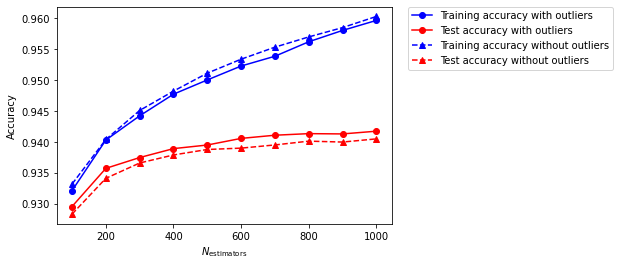

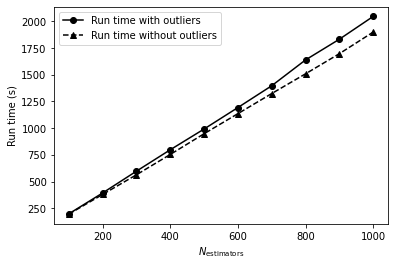

In [63]:
plt.figure()
plt.plot(estimators,gbc_train_accuracy,'o-b', label='Training accuracy with outliers')
plt.plot(estimators,gbc_test_accuracy,'o-r', label='Test accuracy with outliers')
plt.plot(estimators,gbc_train_accuracy_o,'--b^', label='Training accuracy without outliers')
plt.plot(estimators,gbc_test_accuracy_o,'--r^', label='Test accuracy without outliers')

plt.xlabel('$N_\mathrm{estimators}$')
plt.ylabel('Accuracy')
lgd=plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("gbc_comp.pdf",bbox_extra_artists=(lgd,), bbox_inches='tight')

plt.show()

plt.plot(estimators, run_time, 'o-k', label='Run time with outliers')
plt.plot(estimators, run_time_o, '--k^', label='Run time without outliers')
plt.xlabel('$N_\mathrm{estimators}$')
plt.ylabel('Run time (s)')


plt.legend(loc=2)
plt.savefig("runtimegbc_comp.pdf")

plt.show()

#**Miglioriamo la ricerca dei parametri**

In [48]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {"n_estimators": [100, 500, 1000],
              "learning_rate": [0.01,0.05,0.1]
             }

GBC = GradientBoostingClassifier(min_samples_split=2, random_state=0, warm_start=True)

start_time=time.time()
cv_inst = RandomizedSearchCV(GBC,
  param_distributions = param_grid,
  cv=3,
  n_iter = 10,
  n_jobs=-1)

cv_inst.fit(x_test, y_test)
print(time.time()-start_time)

6956.276021003723


In [49]:
cv_inst.best_params_

{'learning_rate': 0.1, 'n_estimators': 1000}

#**Feature Importance con gbc**

In [50]:
'''x_train=x_train.drop(columns=['signal'])
x_test=x_test.drop(columns=['signal'])
y_train=y_train.drop(columns=['signal'])
y_test=y_test.drop(columns=['signal'])'''

"x_train=x_train.drop(columns=['signal'])\nx_test=x_test.drop(columns=['signal'])\ny_train=y_train.drop(columns=['signal'])\ny_test=y_test.drop(columns=['signal'])"

In [51]:
gbc1000 = GradientBoostingClassifier(n_estimators=1000, min_samples_split=2, random_state=0, warm_start=True)
gbc1000.fit(x_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1000,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0, warm_start=True)

In [52]:
importances = gbc1000.feature_importances_
std = np.std([gbc1000.feature_importances_ for tree in gbc1000.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print('Feature by percentage of importance:\n')
for f in range(x_train.shape[1]):
  print('%d feature %d  (%f)' %(f+1, indices[f], importances[indices[f]]))

Feature by percentage of importance:

1 feature 0  (0.248333)
2 feature 16  (0.208344)
3 feature 2  (0.111293)
4 feature 1  (0.062617)
5 feature 31  (0.056420)
6 feature 26  (0.053300)
7 feature 12  (0.046018)
8 feature 3  (0.028319)
9 feature 15  (0.020138)
10 feature 22  (0.019434)
11 feature 25  (0.017935)
12 feature 5  (0.009815)
13 feature 27  (0.009637)
14 feature 13  (0.008075)
15 feature 17  (0.007334)
16 feature 20  (0.007104)
17 feature 4  (0.006772)
18 feature 10  (0.006402)
19 feature 11  (0.005464)
20 feature 6  (0.005335)
21 feature 42  (0.005271)
22 feature 36  (0.005102)
23 feature 38  (0.005080)
24 feature 29  (0.004474)
25 feature 8  (0.003939)
26 feature 24  (0.003718)
27 feature 23  (0.003111)
28 feature 47  (0.002685)
29 feature 9  (0.002620)
30 feature 19  (0.002501)
31 feature 45  (0.001856)
32 feature 41  (0.001846)
33 feature 28  (0.001631)
34 feature 40  (0.001525)
35 feature 30  (0.001438)
36 feature 39  (0.001376)
37 feature 44  (0.001347)
38 feature 33  (0.

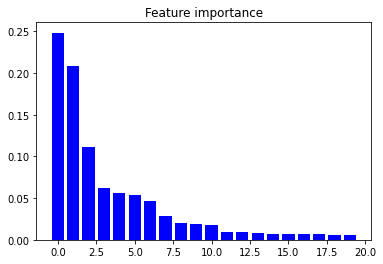

In [53]:
#Grafichiamo l'istogramma delle featue importances, ponendo come indice sull'asse
#delle ascisse la posizione nella classifica delle feature più preponderanti
plt.figure()
plt.title('Feature importance')
#plt.bar(range(x_train.shape[1]), importances[indices], color='b')
plt.bar(range(0, 20), importances[indices[:20]], color='b')

plt.show()

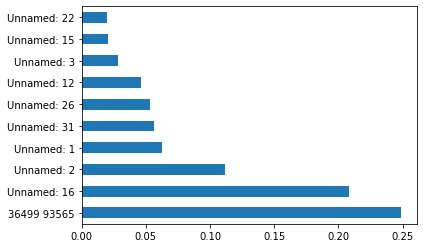

In [54]:
import matplotlib.pyplot as plt

feat_importances = pd.Series(importances, index=x_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

#**Regressione logistica**

In [55]:
from sklearn.linear_model import LogisticRegressionCV

logreg = LogisticRegressionCV()

start_time = time.time()
logreg.fit(x_train, y_train)
logreg_runtime = time.time() - start_time
logregacc = logreg.score(x_test, y_test)
logregpred = logreg.predict(x_test)

logreg_result = (logreg_runtime, logregacc)
print('{0:<15}{1:<15}'.format("time (s)", "test score"))
print('{0:<15.4f}{1:<15.4f}'.format(*logreg_result))
print('\nConfusion matrix:')
print(confusion_matrix(y_test, logregpred))

time (s)       test score     
133.3080       0.8975         

Confusion matrix:
[[29239  1655]
 [ 2745  9283]]


In [56]:
logreg_prob = logreg.predict_proba(x_test)
print(logreg_prob)

[[0.60053933 0.39946067]
 [0.32582705 0.67417295]
 [0.97810993 0.02189007]
 ...
 [0.99574605 0.00425395]
 [0.97931158 0.02068842]
 [0.9873908  0.0126092 ]]


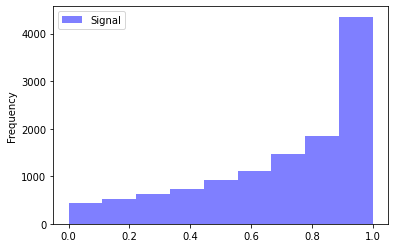

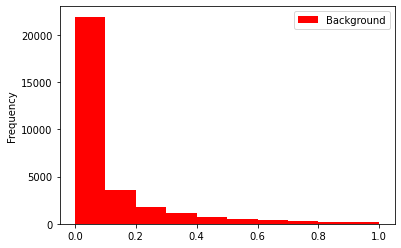

In [57]:
# grafico delle probabilità delle due classi:
y_test = pd.Series(y_test).values
df_test_acc = pd.DataFrame({'PROB':logreg_prob[:,1]})
df_test_acc['SIG'] = y_test

df_test_acc_sig = df_test_acc.query('SIG==1')
df_test_acc_bkg = df_test_acc.query('SIG==0')
df_test_acc_sig.plot(kind='hist',y='PROB',color='blue',alpha=0.5,bins=np.linspace(0,1,10),label='Signal')
df_test_acc_bkg.plot(kind='hist',y='PROB',color='red',label='Background')

#**PCA e TSNE**

In [58]:
'''from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

seed=12345'''

'from sklearn.decomposition import PCA\nfrom sklearn.manifold import TSNE\n\nseed=12345'

In [59]:
'''np.random.seed(seed)
rndperm = np.random.permutation(df.shape[0])

# selezioniamo i primi 10k eventi dal dataframe 
N = 50000
df_subset = df.loc[rndperm[:N],:].copy()
df_copy=df_subset
df_subset = df_subset.drop(columns= 'signal')
columns=["lepton 1 pT", "lepton 1 eta", "lepton 1 phi", "lepton 2 pT", "lepton 2 eta", 
         "lepton 2 phi", "missing energy magnitude", "missing energy phi", "MET_rel", 
         "axial MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos(theta_r1)"]

data_subset = df_subset.values

pca_10 = PCA(n_components=10)
pca_result_10 = pca_10.fit_transform(data_subset)
print('Cumulative explained variation for 10 principal components: {}'.format(np.sum(pca_10.explained_variance_ratio_)))

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=60, n_iter=1000)
tsne_pca_results = tsne.fit_transform(pca_result_10)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))'''

'np.random.seed(seed)\nrndperm = np.random.permutation(df.shape[0])\n\n# selezioniamo i primi 10k eventi dal dataframe \nN = 50000\ndf_subset = df.loc[rndperm[:N],:].copy()\ndf_copy=df_subset\ndf_subset = df_subset.drop(columns= \'signal\')\ncolumns=["lepton 1 pT", "lepton 1 eta", "lepton 1 phi", "lepton 2 pT", "lepton 2 eta", \n         "lepton 2 phi", "missing energy magnitude", "missing energy phi", "MET_rel", \n         "axial MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos(theta_r1)"]\n\ndata_subset = df_subset.values\n\npca_10 = PCA(n_components=10)\npca_result_10 = pca_10.fit_transform(data_subset)\nprint(\'Cumulative explained variation for 10 principal components: {}\'.format(np.sum(pca_10.explained_variance_ratio_)))\n\ntime_start = time.time()\ntsne = TSNE(n_components=2, verbose=1, perplexity=60, n_iter=1000)\ntsne_pca_results = tsne.fit_transform(pca_result_10)\nprint(\'t-SNE done! Time elapsed: {} seconds\'.format(time.time()-time_start))'

In [60]:
'''df_subset['tsne-pca10-one'] = tsne_pca_results[:,0]
df_subset['tsne-pca10-two'] = tsne_pca_results[:,1]
df_subset['signal'] = df_copy['signal']
ax4=df_subset.plot.scatter(x="tsne-pca10-one", y="tsne-pca10-two", c='signal', colormap='tab10',figsize=(8,8))'''

'df_subset[\'tsne-pca10-one\'] = tsne_pca_results[:,0]\ndf_subset[\'tsne-pca10-two\'] = tsne_pca_results[:,1]\ndf_subset[\'signal\'] = df_copy[\'signal\']\nax4=df_subset.plot.scatter(x="tsne-pca10-one", y="tsne-pca10-two", c=\'signal\', colormap=\'tab10\',figsize=(8,8))'